# Player Game Stats Deep Dive

In [87]:
# Importing base packages
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [163]:
# Reading in data
os.chdir('/Users/wesjurden/Documents/GitHub/Personal/college-football-project/data/transform')

df = pd.read_csv('trans_player_game_stats_data_2022.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40723 entries, 0 to 40722
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   game_id       40723 non-null  int64  
 1   school        40723 non-null  object 
 2   conference    40723 non-null  object 
 3   homeAway      40723 non-null  object 
 4   points        40723 non-null  int64  
 5   category      40723 non-null  object 
 6   athlete_id    40723 non-null  int64  
 7   athlete_name  40723 non-null  object 
 8   AVG           17446 non-null  float64
 9   C/ATT         1558 non-null   object 
 10  CAR           5480 non-null   float64
 11  FG            1033 non-null   object 
 12  FUM           1626 non-null   float64
 13  INT           2311 non-null   float64
 14  In 20         1068 non-null   float64
 15  LONG          16921 non-null  float64
 16  LOST          1626 non-null   float64
 17  NO            2991 non-null   float64
 18  PCT           1033 non-nul

In [164]:
df.head()

,game_id,school,conference,homeAway,points,category,athlete_id,athlete_name,AVG,C/ATT,...,TFL,TOT,XP,YDS,PASS_COMP,PASS_ATT,FG_GOOD,FG_ATT,XP_GOOD,XP_ATT
0,401403853,Hawai'i,Mountain West,home,10,defensive,4245660,Malik Hausman,NaN,NaN,...,0.0,4.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1,401403853,Hawai'i,Mountain West,home,10,defensive,4256089,Penei Pavihi,NaN,NaN,...,0.0,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
2,401403853,Hawai'i,Mountain West,home,10,defensive,4259574,Kolby Wyatt,NaN,NaN,...,0.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,401403853,Hawai'i,Mountain West,home,10,defensive,4361782,Hugh Nelson,NaN,NaN,...,0.0,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
4,401403853,Hawai'i,Mountain West,home,10,defensive,4373945,Jonah Kahahawai-Welch,NaN,NaN,...,0.0,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
df.describe()

,game_id,points,athlete_id,AVG,CAR,FUM,INT,In 20,LONG,LOST,...,TD,TFL,TOT,YDS,PASS_COMP,PASS_ATT,FG_GOOD,FG_ATT,XP_GOOD,XP_ATT
count,4.072300e+04,40723.000000,4.072300e+04,17446.000000,5480.000000,1626.000000,2311.000000,1068.000000,16921.000000,1626.000000,...,36996.000000,19865.000000,19865.000000,19865.000000,1558.000000,1558.000000,1033.000000,1033.000000,1033.000000,1033.000000
mean,4.014076e+08,28.396115,4.455989e+06,10.833108,6.484672,0.731857,0.681523,1.335206,18.301401,0.354859,...,0.138231,0.266272,3.096854,1.779562,12.541720,20.480745,1.087125,1.428848,3.029042,3.081317
std,8.175560e+03,15.590588,6.086441e+05,12.039688,6.071466,0.609206,0.680464,1.172952,16.672220,0.524036,...,0.473292,0.540976,2.560127,1.735821,9.821685,15.053468,1.046477,1.180847,2.100002,2.094930
min,4.014039e+08,0.000000,-1.070060e+05,-54.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.014040e+08,17.000000,4.373693e+06,3.500000,2.000000,0.000000,0.000000,0.000000,6.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,3.000000,5.000000,0.000000,1.000000,1.000000,1.000000
50%,4.014041e+08,28.000000,4.431519e+06,7.300000,5.000000,1.000000,1.000000,1.000000,13.000000,0.000000,...,0.000000,0.000000,2.000000,1.000000,12.500000,21.000000,1.000000,1.000000,3.000000,3.000000
75%,4.014052e+08,39.000000,4.684758e+06,14.000000,10.000000,1.000000,1.000000,2.000000,26.000000,1.000000,...,0.000000,0.500000,4.000000,3.000000,20.000000,32.000000,2.000000,2.000000,4.000000,4.000000
max,4.014709e+08,77.000000,5.104929e+06,100.000000,41.000000,4.000000,4.000000,7.000000,100.000000,3.000000,...,6.000000,6.000000,19.000000,14.000000,42.000000,67.000000,5.000000,6.000000,11.000000,11.000000


In [173]:
df.query("category == 'rushing'")

,game_id,school,conference,homeAway,points,category,athlete_id,athlete_name,AVG,C/ATT,...,TFL,TOT,XP,YDS,PASS_COMP,PASS_ATT,FG_GOOD,FG_ATT,XP_GOOD,XP_ATT
40,401403853,Hawai'i,Mountain West,home,10,rushing,4367728,Dedrick Parson,6.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,401403853,Hawai'i,Mountain West,home,10,rushing,4426360,Joey Yellen,-7.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,401403853,Hawai'i,Mountain West,home,10,rushing,4685644,Jordan Johnson,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,401403853,Hawai'i,Mountain West,home,10,rushing,4709977,Brayden Schager,-7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,401403853,Hawai'i,Mountain West,home,10,rushing,4875793,Nasjza Bryant,5.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40699,401470891,North Carolina,ACC,home,27,rushing,4688818,D.J. Jones,4.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40719,401470891,Oregon,Pac-12,away,28,rushing,4426338,Bo Nix,1.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40720,401470891,Oregon,Pac-12,away,28,rushing,4432631,Noah Whittington,2.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40721,401470891,Oregon,Pac-12,away,28,rushing,4596448,Mar'Keise Irving,11.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
df.iloc[:,0:20].query("category == 'rushing'")

,game_id,school,conference,homeAway,points,category,athlete_id,athlete_name,AVG,C/ATT,CAR,FG,FUM,INT,In 20,LONG,LOST,NO,PCT,PD
40,401403853,Hawai'i,Mountain West,home,10,rushing,4367728,Dedrick Parson,6.3,NaN,13.0,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,NaN
41,401403853,Hawai'i,Mountain West,home,10,rushing,4426360,Joey Yellen,-7.5,NaN,2.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
42,401403853,Hawai'i,Mountain West,home,10,rushing,4685644,Jordan Johnson,7.0,NaN,3.0,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN
43,401403853,Hawai'i,Mountain West,home,10,rushing,4709977,Brayden Schager,-7.0,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
44,401403853,Hawai'i,Mountain West,home,10,rushing,4875793,Nasjza Bryant,5.3,NaN,4.0,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40699,401470891,North Carolina,ACC,home,27,rushing,4688818,D.J. Jones,4.5,NaN,2.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN
40719,401470891,Oregon,Pac-12,away,28,rushing,4426338,Bo Nix,1.2,NaN,5.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN
40720,401470891,Oregon,Pac-12,away,28,rushing,4432631,Noah Whittington,2.5,NaN,11.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN
40721,401470891,Oregon,Pac-12,away,28,rushing,4596448,Mar'Keise Irving,11.5,NaN,13.0,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,NaN


In [182]:
df.columns

Index(['game_id', 'school', 'conference', 'homeAway', 'points', 'category',
       'athlete_id', 'athlete_name', 'AVG', 'C/ATT', 'CAR', 'FG', 'FUM', 'INT',
       'In 20', 'LONG', 'LOST', 'NO', 'PCT', 'PD', 'PTS', 'QB HUR', 'QBR',
       'REC', 'SACKS', 'SOLO', 'TB', 'TD', 'TFL', 'TOT', 'XP', 'YDS',
       'PASS_COMP', 'PASS_ATT', 'FG_GOOD', 'FG_ATT', 'XP_GOOD', 'XP_ATT'],
      dtype='object')

In [196]:
osu = df.query("school == 'Ohio State'")
osu

,game_id,school,conference,homeAway,points,category,athlete_id,athlete_name,AVG,C/ATT,...,TFL,TOT,XP,YDS,PASS_COMP,PASS_ATT,FG_GOOD,FG_ATT,XP_GOOD,XP_ATT
21948,401404124,Ohio State,Big Ten,home,21,defensive,4361338,Taron Vincent,NaN,NaN,...,0.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
21949,401404124,Ohio State,Big Ten,home,21,defensive,4361357,Javontae Jean-Baptiste,NaN,NaN,...,0.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
21950,401404124,Ohio State,Big Ten,home,21,defensive,4361362,Tyler Friday,NaN,NaN,...,0.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
21951,401404124,Ohio State,Big Ten,home,21,defensive,4361824,Tanner McCalister,NaN,NaN,...,0.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
21952,401404124,Ohio State,Big Ten,home,21,defensive,4385430,Xavier Johnson,NaN,NaN,...,0.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40057,401442015,Ohio State,Big Ten,away,41,rushing,4385430,Xavier Johnson,4.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40058,401442015,Ohio State,Big Ten,away,41,rushing,4432577,C.J. Stroud,2.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40059,401442015,Ohio State,Big Ten,away,41,rushing,4432637,Miyan Williams,2.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40060,401442015,Ohio State,Big Ten,away,41,rushing,4567750,Emeka Egbuka,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [257]:
long = osu[['athlete_name', 'LONG']].sort_values(['LONG'], ascending=False).groupby(['athlete_name']).agg(['mean'])
long

,LONG
,mean
athlete_name,
Team,0.000000
C.J. Hicks,NaN
C.J. Stroud,9.166667
Cade Stover,17.846154
Caden Curry,NaN
...,...
Ty Hamilton,NaN
Tyleik Williams,NaN


In [258]:
osu.columns

Index(['game_id', 'school', 'conference', 'homeAway', 'points', 'category',
       'athlete_id', 'athlete_name', 'AVG', 'C/ATT', 'CAR', 'FG', 'FUM', 'INT',
       'In 20', 'LONG', 'LOST', 'NO', 'PCT', 'PD', 'PTS', 'QB HUR', 'QBR',
       'REC', 'SACKS', 'SOLO', 'TB', 'TD', 'TFL', 'TOT', 'XP', 'YDS',
       'PASS_COMP', 'PASS_ATT', 'FG_GOOD', 'FG_ATT', 'XP_GOOD', 'XP_ATT'],
      dtype='object')

In [301]:
# Creating qb data frame
qb_data = df[['athlete_name','school','conference','homeAway','category','C/ATT','PASS_COMP','PASS_ATT', 'INT', 'QBR', 'TD', 'AVG']].dropna()
qb_data

,athlete_name,school,conference,homeAway,category,C/ATT,PASS_COMP,PASS_ATT,INT,QBR,TD,AVG
28,Joey Yellen,Hawai'i,Mountain West,home,passing,10/20,10.0,20.0,0.0,19.4,0.0,4.5
29,Brayden Schager,Hawai'i,Mountain West,home,passing,18/35,18.0,35.0,0.0,22.4,0.0,4.6
75,Mike Wright,Vanderbilt,SEC,away,passing,13/21,13.0,21.0,0.0,71.4,2.0,7.0
76,AJ Swann,Vanderbilt,SEC,away,passing,3/7,3.0,7.0,0.0,3.6,0.0,7.3
117,Jalen Milroe,Alabama,SEC,home,passing,8/10,8.0,10.0,1.0,56.8,1.0,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...
39191,Robby Ashford,Auburn,SEC,home,passing,8/19,8.0,19.0,0.0,36.1,0.0,5.4
39192,Jarquez Hunter,Auburn,SEC,home,passing,1/1,1.0,1.0,0.0,100.0,1.0,20.0
39231,Austin Reed,Western Kentucky,Conference USA,away,passing,26/55,26.0,55.0,2.0,57.4,2.0,5.3
39232,Dalvin Smith,Western Kentucky,Conference USA,away,passing,0/1,0.0,1.0,0.0,3.7,0.0,0.0


In [302]:
# Calculatign total pass yards
qb_data['TOT_PASS_YDS'] = round(qb_data['PASS_COMP'] * qb_data['AVG'],0)
qb_data

,athlete_name,school,conference,homeAway,category,C/ATT,PASS_COMP,PASS_ATT,INT,QBR,TD,AVG,TOT_PASS_YDS
28,Joey Yellen,Hawai'i,Mountain West,home,passing,10/20,10.0,20.0,0.0,19.4,0.0,4.5,45.0
29,Brayden Schager,Hawai'i,Mountain West,home,passing,18/35,18.0,35.0,0.0,22.4,0.0,4.6,83.0
75,Mike Wright,Vanderbilt,SEC,away,passing,13/21,13.0,21.0,0.0,71.4,2.0,7.0,91.0
76,AJ Swann,Vanderbilt,SEC,away,passing,3/7,3.0,7.0,0.0,3.6,0.0,7.3,22.0
117,Jalen Milroe,Alabama,SEC,home,passing,8/10,8.0,10.0,1.0,56.8,1.0,7.6,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39191,Robby Ashford,Auburn,SEC,home,passing,8/19,8.0,19.0,0.0,36.1,0.0,5.4,43.0
39192,Jarquez Hunter,Auburn,SEC,home,passing,1/1,1.0,1.0,0.0,100.0,1.0,20.0,20.0
39231,Austin Reed,Western Kentucky,Conference USA,away,passing,26/55,26.0,55.0,2.0,57.4,2.0,5.3,138.0
39232,Dalvin Smith,Western Kentucky,Conference USA,away,passing,0/1,0.0,1.0,0.0,3.7,0.0,0.0,0.0


In [303]:
# Resetting index
qb_data = qb_data.reset_index(drop=True)
qb_data

,athlete_name,school,conference,homeAway,category,C/ATT,PASS_COMP,PASS_ATT,INT,QBR,TD,AVG,TOT_PASS_YDS
0,Joey Yellen,Hawai'i,Mountain West,home,passing,10/20,10.0,20.0,0.0,19.4,0.0,4.5,45.0
1,Brayden Schager,Hawai'i,Mountain West,home,passing,18/35,18.0,35.0,0.0,22.4,0.0,4.6,83.0
2,Mike Wright,Vanderbilt,SEC,away,passing,13/21,13.0,21.0,0.0,71.4,2.0,7.0,91.0
3,AJ Swann,Vanderbilt,SEC,away,passing,3/7,3.0,7.0,0.0,3.6,0.0,7.3,22.0
4,Jalen Milroe,Alabama,SEC,home,passing,8/10,8.0,10.0,1.0,56.8,1.0,7.6,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,Robby Ashford,Auburn,SEC,home,passing,8/19,8.0,19.0,0.0,36.1,0.0,5.4,43.0
1308,Jarquez Hunter,Auburn,SEC,home,passing,1/1,1.0,1.0,0.0,100.0,1.0,20.0,20.0
1309,Austin Reed,Western Kentucky,Conference USA,away,passing,26/55,26.0,55.0,2.0,57.4,2.0,5.3,138.0
1310,Dalvin Smith,Western Kentucky,Conference USA,away,passing,0/1,0.0,1.0,0.0,3.7,0.0,0.0,0.0


In [316]:
# Top 20 qbs by total yards with summary statistics
qb_data[['athlete_name', 'school','TOT_PASS_YDS']].groupby(['athlete_name', 'school']).agg(['sum', 'min','mean', 'median','max', 'std']).sort_values(('TOT_PASS_YDS', 'sum'), ascending=False).head(20)

TOT_PASS_YDS                     \
                                                    sum    min        mean   
athlete_name             school                                              
Michael Penix Jr.        Washington              2917.0  141.0  243.083333   
Drake Maye               North Carolina          2639.0  107.0  219.916667   
Will Rogers              Mississippi State       2589.0  117.0  215.750000   
Caleb Williams           USC                     2512.0   80.0  209.333333   
Bo Nix                   Oregon                  2494.0   90.0  207.833333   
Jayden de Laura          Arizona                 2362.0   80.0  196.833333   
C.J. Stroud              Ohio State              2298.0   29.0  191.500000   
Hendon Hooker            Tennessee               2222.0  136.0  202.000000   
Sam Hartman              Wake Forest             2166.0  152.0  196.909091   
Max Duggan               TCU                     2065.0   18.0  172.083333   
Stetson Bennett          Georgia                 2061.0   79.0  187.363636   
Hunter Dekkers           Iowa State              2043.0   53.0  170.250000   
Aidan O'Connell          Purdue                  2042.0   78.0  185.636364   
Dorian Thompson-Robinson UCLA                    2033.0   83.0  169.416667   
Cameron Ward             Washington State        2003.0   88.0  166.916667   
Taulia Tagovailoa        Maryland                1985.0   33.0  180.454545   
Jack Plummer             California              1972.0   80.0  164.333333   
Bryce Young              Alabama                 1948.0   93.0  177.090909   
Tanner McKee             Stanford                1884.0   52.0  157.000000   
Dillon Gabriel           Oklahoma                1880.0   55.0  170.909091   

                                                                     
                                           median    max        std  
athlete_name             school                                      
Michael Penix Jr.        Washington         238.0  421.0  73.160419  
Drake Maye               North Carolina     226.5  299.0  59.841394  
Will Rogers              Mississippi State  234.5  350.0  77.310619  
Caleb Williams           USC                221.5  349.0  75.963309  
Bo Nix                   Oregon             214.0  320.0  70.483826  
Jayden de Laura          Arizona            202.5  346.0  80.907167  
C.J. Stroud              Ohio State         185.0  299.0  81.108793  
Hendon Hooker            Tennessee          207.0  275.0  50.342825  
Sam Hartman              Wake Forest        195.0  241.0  30.943350  
Max Duggan               TCU                189.5  308.0  76.211975  
Stetson Bennett          Georgia            195.0  298.0  54.540394  
Hunter Dekkers           Iowa State         182.0  238.0  53.150088  
Aidan O'Connell          Purdue             180.0  300.0  68.765213  
Dorian Thompson-Robinson UCLA               178.5  234.0  48.440138  
Cameron Ward             Washington State   147.5  289.0  59.648148  
Taulia Tagovailoa        Maryland           204.0  340.0  89.250618  
Jack Plummer             California         154.5  290.0  55.182892  
Bryce Young              Alabama            160.0  308.0  64.659809  
Tanner McKee             Stanford           169.0  251.0  62.467446  
Dillon Gabriel           Oklahoma           152.0  314.0  80.049303

In [320]:
# Top 20 qbs by QBR with summary statistics
qb_data[['athlete_name', 'school','QBR']].groupby(['athlete_name', 'school']).agg(['sum', 'min','mean', 'median','max', 'std']).sort_values(('QBR', 'sum'), ascending=False).head(20)

QBR                          \
                                               sum   min       mean median   
athlete_name             school                                              
Bo Nix                   Oregon             1024.2  58.9  85.350000  88.25   
C.J. Stroud              Ohio State         1005.1  59.3  83.758333  86.30   
Caleb Williams           USC                 988.9  53.7  82.408333  86.25   
Drake Maye               North Carolina      981.9  34.9  81.825000  88.25   
Dorian Thompson-Robinson UCLA                958.4  37.3  79.866667  84.55   
Hendon Hooker            Tennessee           953.3  60.7  86.663636  89.90   
Michael Penix Jr.        Washington          931.2  55.2  77.600000  80.30   
Max Duggan               TCU                 927.9  32.6  77.325000  82.80   
Jordan Travis            Florida State       919.5  66.6  83.590909  85.30   
J.J. McCarthy            Michigan            908.6  46.7  75.716667  77.90   
Stetson Bennett          Georgia             894.9  63.2  81.354545  75.40   
Bryce Young              Alabama             882.4  36.9  80.218182  81.70   
Riley Leonard            Duke                852.8  37.6  71.066667  78.25   
Cameron Rising           Utah                832.8  33.4  75.709091  88.30   
Anthony Richardson       Florida             813.3   3.8  67.775000  80.45   
Sean Clifford            Penn State          813.2  37.9  67.766667  67.05   
Jayden Daniels           LSU                 811.0   9.7  73.727273  77.80   
Jaxson Dart              Ole Miss            794.1  -1.0  66.175000  74.40   
Payton Thorne            Michigan State      779.0  10.3  64.916667  69.20   
Will Rogers              Mississippi State   778.8  27.8  64.900000  69.80   

                                                              
                                              max        std  
athlete_name             school                               
Bo Nix                   Oregon              96.3  10.549149  
C.J. Stroud              Ohio State          99.4  13.925285  
Caleb Williams           USC                 97.6  14.341450  
Drake Maye               North Carolina      94.8  17.276054  
Dorian Thompson-Robinson UCLA                98.3  17.270644  
Hendon Hooker            Tennessee           96.9  10.242975  
Michael Penix Jr.        Washington          96.3  14.832458  
Max Duggan               TCU                 99.9  20.262869  
Jordan Travis            Florida State       98.9  11.597625  
J.J. McCarthy            Michigan            99.9  17.615945  
Stetson Bennett          Georgia             98.1  12.494668  
Bryce Young              Alabama             98.1  16.836972  
Riley Leonard            Duke                98.9  18.953740  
Cameron Rising           Utah                96.3  22.381039  
Anthony Richardson       Florida            100.0  31.964871  
Sean Clifford            Penn State          92.8  15.084509  
Jayden Daniels           LSU                 99.4  25.296130  
Jaxson Dart              Ole Miss            89.6  25.483439  
Payton Thorne            Michigan State      92.1  20.917754  
Will Rogers              Mississippi State   84.6  18.866613

In [321]:
df.columns

Index(['game_id', 'school', 'conference', 'homeAway', 'points', 'category',
       'athlete_id', 'athlete_name', 'AVG', 'C/ATT', 'CAR', 'FG', 'FUM', 'INT',
       'In 20', 'LONG', 'LOST', 'NO', 'PCT', 'PD', 'PTS', 'QB HUR', 'QBR',
       'REC', 'SACKS', 'SOLO', 'TB', 'TD', 'TFL', 'TOT', 'XP', 'YDS',
       'PASS_COMP', 'PASS_ATT', 'FG_GOOD', 'FG_ATT', 'XP_GOOD', 'XP_ATT'],
      dtype='object')

In [337]:
# Creating qb data frame
rb_data = df[['athlete_name','school','conference','homeAway','category','CAR', 'AVG', 'LONG', 'TD']].dropna()
rb_data

,athlete_name,school,conference,homeAway,category,CAR,AVG,LONG,TD
40,Dedrick Parson,Hawai'i,Mountain West,home,rushing,13.0,6.3,37.0,1.0
41,Joey Yellen,Hawai'i,Mountain West,home,rushing,2.0,-7.5,0.0,0.0
42,Jordan Johnson,Hawai'i,Mountain West,home,rushing,3.0,7.0,18.0,0.0
43,Brayden Schager,Hawai'i,Mountain West,home,rushing,1.0,-7.0,0.0,0.0
44,Nasjza Bryant,Hawai'i,Mountain West,home,rushing,4.0,5.3,9.0,0.0
...,...,...,...,...,...,...,...,...,...
40699,D.J. Jones,North Carolina,ACC,home,rushing,2.0,4.5,8.0,0.0
40719,Bo Nix,Oregon,Pac-12,away,rushing,5.0,1.2,6.0,0.0
40720,Noah Whittington,Oregon,Pac-12,away,rushing,11.0,2.5,8.0,0.0
40721,Mar'Keise Irving,Oregon,Pac-12,away,rushing,13.0,11.5,66.0,2.0


In [338]:
# Resetting index
rb_data = rb_data.reset_index(drop=True)
rb_data

,athlete_name,school,conference,homeAway,category,CAR,AVG,LONG,TD
0,Dedrick Parson,Hawai'i,Mountain West,home,rushing,13.0,6.3,37.0,1.0
1,Joey Yellen,Hawai'i,Mountain West,home,rushing,2.0,-7.5,0.0,0.0
2,Jordan Johnson,Hawai'i,Mountain West,home,rushing,3.0,7.0,18.0,0.0
3,Brayden Schager,Hawai'i,Mountain West,home,rushing,1.0,-7.0,0.0,0.0
4,Nasjza Bryant,Hawai'i,Mountain West,home,rushing,4.0,5.3,9.0,0.0
...,...,...,...,...,...,...,...,...,...
5475,D.J. Jones,North Carolina,ACC,home,rushing,2.0,4.5,8.0,0.0
5476,Bo Nix,Oregon,Pac-12,away,rushing,5.0,1.2,6.0,0.0
5477,Noah Whittington,Oregon,Pac-12,away,rushing,11.0,2.5,8.0,0.0
5478,Mar'Keise Irving,Oregon,Pac-12,away,rushing,13.0,11.5,66.0,2.0


In [340]:
# Calculatign total pass yards
rb_data['TOT_RUSH_YDS'] = round(rb_data['CAR'] * rb_data['AVG'],0)
rb_data

,athlete_name,school,conference,homeAway,category,CAR,AVG,LONG,TD,TOT_RUSH_YDS
0,Dedrick Parson,Hawai'i,Mountain West,home,rushing,13.0,6.3,37.0,1.0,82.0
1,Joey Yellen,Hawai'i,Mountain West,home,rushing,2.0,-7.5,0.0,0.0,-15.0
2,Jordan Johnson,Hawai'i,Mountain West,home,rushing,3.0,7.0,18.0,0.0,21.0
3,Brayden Schager,Hawai'i,Mountain West,home,rushing,1.0,-7.0,0.0,0.0,-7.0
4,Nasjza Bryant,Hawai'i,Mountain West,home,rushing,4.0,5.3,9.0,0.0,21.0
...,...,...,...,...,...,...,...,...,...,...
5475,D.J. Jones,North Carolina,ACC,home,rushing,2.0,4.5,8.0,0.0,9.0
5476,Bo Nix,Oregon,Pac-12,away,rushing,5.0,1.2,6.0,0.0,6.0
5477,Noah Whittington,Oregon,Pac-12,away,rushing,11.0,2.5,8.0,0.0,28.0
5478,Mar'Keise Irving,Oregon,Pac-12,away,rushing,13.0,11.5,66.0,2.0,150.0


In [342]:
# Top 20 RBs by total yards with summary statistics
rb_data[['athlete_name', 'school','TOT_RUSH_YDS']].groupby(['athlete_name', 'school']).agg(['sum', 'min','mean', 'median','max', 'std']).sort_values(('TOT_RUSH_YDS', 'sum'), ascending=False).head(20)

TOT_RUSH_YDS                                  \
                                          sum   min        mean median    max   
athlete_name       school                                                       
Mohamed Ibrahim    Minnesota           1661.0  70.0  138.416667  129.5  261.0   
Chase Brown        Illinois            1642.0  61.0  136.833333  142.5  198.0   
Bijan Robinson     Texas               1578.0  29.0  131.500000  132.0  242.0   
Quinshon Judkins   Ole Miss            1567.0  46.0  120.538462  106.0  214.0   
Deuce Vaughn       Kansas State        1554.0  23.0  111.000000  120.5  170.0   
Blake Corum        Michigan            1464.0   6.0  122.000000  117.5  243.0   
Raheim Sanders     Arkansas            1446.0  17.0  111.230769  101.0  233.0   
Israel Abanikanda  Pittsburgh          1430.0  15.0  130.000000  127.0  320.0   
Kendre Miller      TCU                 1401.0  41.0  100.071429   95.5  158.0   
Eric Gray          Oklahoma            1365.0  59.0  113.750000  104.0  210.0   
Zach Charbonnet    UCLA                1358.0  78.0  135.800000  121.5  198.0   
Braelon Allen      Wisconsin           1243.0   2.0  103.583333  115.5  166.0   
Xazavian Valladay  Arizona State       1188.0  30.0   99.000000  109.5  134.0   
Will Shipley       Clemson             1184.0  18.0   84.571429   69.5  173.0   
Devon Achane       Texas A&M           1104.0  41.0  110.400000  105.0  217.0   
Devin Neal         Kansas              1092.0  29.0   84.000000   59.0  224.0   
Sean Tucker        Syracuse            1060.0  19.0   88.333333   79.5  232.0   
Nicholas Singleton Penn State          1052.0  19.0   80.923077   78.0  179.0   
Mar'Keise Irving   Oregon              1051.0  13.0   80.846154   81.0  150.0   
Donovan Edwards    Michigan             993.0  13.0   90.272727   64.0  216.0   

                                             
                                        std  
athlete_name       school                    
Mohamed Ibrahim    Minnesota      54.872511  
Chase Brown        Illinois       35.913617  
Bijan Robinson     Texas          64.047568  
Quinshon Judkins   Ole Miss       46.686214  
Deuce Vaughn       Kansas State   41.270216  
Blake Corum        Michigan       61.139185  
Raheim Sanders     Arkansas       64.711094  
Israel Abanikanda  Pittsburgh     79.223734  
Kendre Miller      TCU            41.302755  
Eric Gray          Oklahoma       46.789908  
Zach Charbonnet    UCLA           43.302040  
Braelon Allen      Wisconsin      45.243700  
Xazavian Valladay  Arizona State  29.729080  
Will Shipley       Clemson        44.643398  
Devon Achane       Texas A&M      52.132737  
Devin Neal         Kansas         59.469880  
Sean Tucker        Syracuse       55.704306  
Nicholas Singleton Penn State     45.866585  
Mar'Keise Irving   Oregon         43.752802  
Donovan Edwards    Michigan       74.458164

In [343]:
# Top 20 RBs by total yards with summary statistics
rb_data[['school','TOT_RUSH_YDS']].groupby(['school']).agg(['sum', 'min','mean', 'median','max', 'std']).sort_values(('TOT_RUSH_YDS', 'sum'), ascending=False).head(20)

TOT_RUSH_YDS                                          
                       sum   min       mean median    max        std
school                                                              
Michigan            3347.0 -17.0  36.380435   14.5  243.0  55.229559
Ole Miss            3334.0 -10.0  45.671233   15.0  214.0  57.073796
UCLA                3090.0 -26.0  47.538462   34.0  198.0  53.448011
Arkansas            3086.0  -9.0  37.634146   17.5  233.0  49.424968
Georgia             3081.0 -18.0  28.794393   20.0  142.0  30.569358
Utah                3044.0 -17.0  32.731183   22.0  180.0  34.442498
Kansas State        2912.0 -23.0  41.600000   21.0  172.0  51.030085
TCU                 2902.0 -41.0  36.275000   25.5  158.0  45.713465
Oklahoma            2860.0 -21.0  33.255814   17.0  210.0  44.354239
Oregon              2805.0 -22.0  35.506329   27.0  150.0  39.641623
Florida State       2785.0 -10.0  32.011494   15.0  164.0  39.337092
Minnesota           2691.0 -28.0  36.863014   16.0  261.0  54.484788
Louisville          2606.0 -18.0  38.323529   24.5  161.0  44.885407
Florida             2602.0 -18.0  38.835821   27.0  161.0  38.234760
Tennessee           2593.0 -18.0  37.042857   24.0  160.0  37.897817
LSU                 2573.0 -14.0  36.239437   28.0  122.0  35.786855
Oregon State        2558.0 -23.0  25.326733   13.0  178.0  35.389012
Alabama             2542.0 -25.0  36.314286   21.5  205.0  42.831501
Ohio State          2506.0 -13.0  32.973684   13.5  189.0  44.386176
Clemson             2503.0 -14.0  34.763889   22.5  173.0  38.735104

In [344]:
# Top 20 RBs by total yards with summary statistics
rb_data[['conference','TOT_RUSH_YDS']].groupby(['conference']).agg(['sum', 'min','mean', 'median','max', 'std']).sort_values(('TOT_RUSH_YDS', 'sum'), ascending=False).head(20)

TOT_RUSH_YDS                                          
                           sum   min       mean median    max        std
conference                                                              
SEC                    32084.0 -39.0  32.310171   18.0  233.0  41.469655
Big Ten                27392.0 -61.0  26.934120   11.0  261.0  42.676320
ACC                    26234.0 -54.0  28.148069   15.0  320.0  37.461266
Pac-12                 24283.0 -32.0  28.334889   15.0  274.0  38.572618
Big 12                 22906.0 -48.0  31.991620   16.0  242.0  42.955400
FBS Independents        3847.0 -21.0  28.080292   21.0  163.0  32.864261
American Athletic       2754.0 -30.0  25.981132   13.5  206.0  35.843305
Mountain West           2541.0 -44.0  23.971698   13.0  211.0  38.493897
Mid-American            2326.0 -41.0  20.584071   10.0  259.0  35.225479
Sun Belt                2140.0 -31.0  22.061856    9.0  132.0  32.111724
Conference USA          1155.0 -34.0  16.985294    9.5  134.0  27.525561
MVFC                     970.0 -21.0  16.724138    9.0  115.0  26.618680
Big Sky                  858.0 -17.0  17.510204    8.0  135.0  29.039572
Southern                 667.0 -34.0  14.191489    8.0   94.0  21.485727
CAA                      644.0 -12.0  20.774194   11.0   88.0  25.894285
SWAC                     519.0 -24.0  13.657895   10.5   80.0  18.608740
Western Athletic         345.0  -7.0  13.800000    6.0   74.0  18.632409
OVC                      317.0 -21.0  12.192308    6.5   74.0  20.049976
Big South                253.0 -13.0  18.071429    4.5  133.0  36.831141
Atlantic Sun             160.0 -24.0  14.545455    8.0   50.0  23.174830

In [345]:
# Top 20 RBs by total yards with summary statistics
qb_data[['school','TOT_PASS_YDS']].groupby(['school']).agg(['sum', 'min','mean', 'median','max', 'std']).sort_values(('TOT_PASS_YDS', 'sum'), ascending=False).head(20)

TOT_PASS_YDS                                            
                           sum   min        mean median    max         std
school                                                                    
Washington              3026.0   5.0  178.000000  195.0  421.0  120.514003
Tennessee               2851.0   0.0  118.791667  103.0  275.0   89.712090
USC                     2649.0  67.0  189.214286  203.5  349.0   86.593816
Mississippi State       2642.0   2.0  165.125000  156.5  350.0  112.390910
North Carolina          2640.0   0.0  176.000000  209.0  299.0  105.258865
Oregon                  2582.0  -4.0  122.952381   99.0  320.0  113.636471
Ohio State              2448.0   5.0  136.000000  151.0  299.0  104.991316
Arizona                 2434.0  -3.0  135.222222  125.0  346.0  111.145139
Wake Forest             2418.0   4.0  161.200000  192.0  241.0   80.378746
Texas Tech              2355.0   0.0  107.045455   80.0  270.0   95.078653
Georgia                 2276.0   0.0  126.444444  150.5  298.0   90.789493
TCU                     2249.0   2.0  124.944444  126.0  308.0   93.328309
Purdue                  2228.0   0.0  139.250000  141.5  300.0   93.987588
UCLA                    2220.0   0.0  138.750000  148.0  234.0   73.271641
Maryland                2204.0   0.0  116.000000  106.0  340.0  104.495082
Alabama                 2163.0   0.0  103.000000   93.0  308.0   93.309699
South Carolina          2132.0   7.0  106.600000   90.5  354.0   88.350022
Iowa State              2110.0   0.0  124.117647  146.0  238.0   86.333570
Washington State        2071.0  32.0  147.928571  135.0  289.0   73.081055
Utah                    2066.0   9.0  129.125000  133.5  282.0   74.387163

In [346]:
# Top 20 RBs by total yards with summary statistics
qb_data[['conference','TOT_PASS_YDS']].groupby(['conference']).agg(['sum', 'min','mean', 'median','max', 'std']).sort_values(('TOT_PASS_YDS', 'sum'), ascending=False).head(20)

TOT_PASS_YDS                                          
                           sum  min        mean median    max        std
conference                                                              
SEC                    26498.0  0.0  108.155102  103.0  354.0  83.038755
Pac-12                 25650.0 -4.0  127.611940  126.0  421.0  92.354527
ACC                    24696.0 -5.0   99.983806   95.0  365.0  79.466563
Big Ten                23792.0  0.0   88.446097   68.0  340.0  78.906530
Big 12                 19476.0 -2.0  105.847826  103.5  314.0  81.906842
FBS Independents        2477.0  0.0   65.184211   42.0  281.0  72.276816
Mid-American            2378.0  0.0   62.578947   48.0  313.0  66.115636
Conference USA          1991.0  0.0   79.640000   57.0  261.0  76.531519
Sun Belt                1974.0 -2.0   98.700000   82.0  270.0  78.843683
American Athletic       1961.0  0.0   98.050000   75.0  214.0  74.578447
Mountain West           1407.0  0.0   56.280000   34.0  232.0  63.386066

In [347]:
# Top 20 RBs by total yards with summary statistics
pass_df = qb_data[['conference','TOT_PASS_YDS']].groupby(['conference']).agg(['sum', 'min','mean', 'median','max', 'std']).sort_values(('TOT_PASS_YDS', 'sum'), ascending=False).head(20)

[]

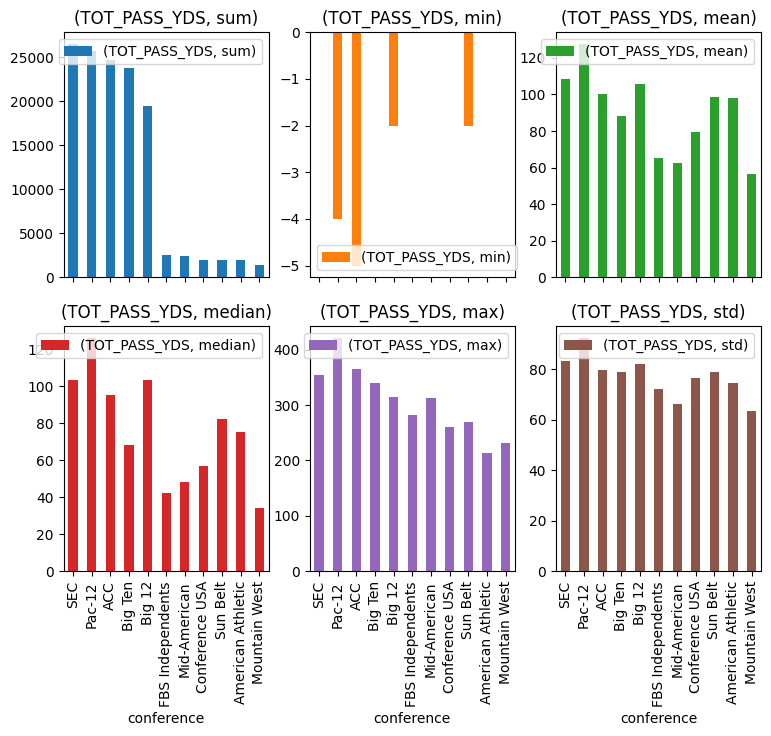

In [368]:
pass_df.plot(kind='bar', subplots=True, rot=90, figsize=(9, 7), layout=(2, 3), sharex=True)
plt.plot()